In [3]:
#Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#Data import
path = "full_grouped.csv"
df = pd.read_csv(path)

df.set_index("Date", inplace=True)
df.index = pd.DatetimeIndex(df.index)
df.sort_index(inplace=True)

print(df.info())
print(df.head())
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35156 entries, 2020-01-22 to 2020-07-27
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  35156 non-null  object
 1   Confirmed       35156 non-null  int64 
 2   Deaths          35156 non-null  int64 
 3   Recovered       35156 non-null  int64 
 4   Active          35156 non-null  int64 
 5   New cases       35156 non-null  int64 
 6   New deaths      35156 non-null  int64 
 7   New recovered   35156 non-null  int64 
 8   WHO Region      35156 non-null  object
dtypes: int64(7), object(2)
memory usage: 2.7+ MB
None
           Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
Date                                                                         
2020-01-22    Afghanistan          0       0          0       0          0   
2020-01-22        Albania          0       0          0       0          0   
2020-01-22        Algeri

In [4]:
#df = df.resample("3D").sum()
print(df.Confirmed.sum())

828508482


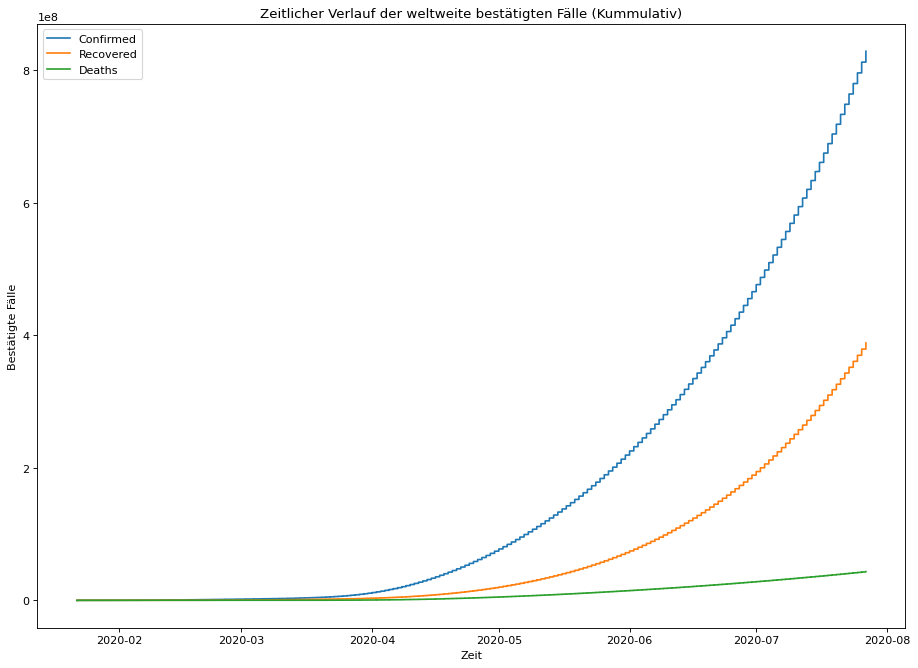

In [5]:
plt.figure(figsize=(14,10), dpi= 80)

#fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncos)

categories = ['Confirmed', 'Recovered', 'Deaths']

for category in categories:
    plt.plot(df[category].cumsum(), label=category)

plt.legend()

plt.title("Zeitlicher Verlauf der weltweite bestätigten Fälle (Kummulativ)")
plt.ylabel("Bestätigte Fälle")
plt.xlabel("Zeit")

plt.show()

                New cases
Country/Region           
Italy              246434
Colombia           257101
Saudi Arabia       268934
Pakistan           274289
Spain              282827
Iran               293606
United Kingdom     301708
Chile              347923
Peru               389717
Mexico             395489
South Africa       452529
Russia             816680
India             1480073
Brazil            2442375
US                4290258


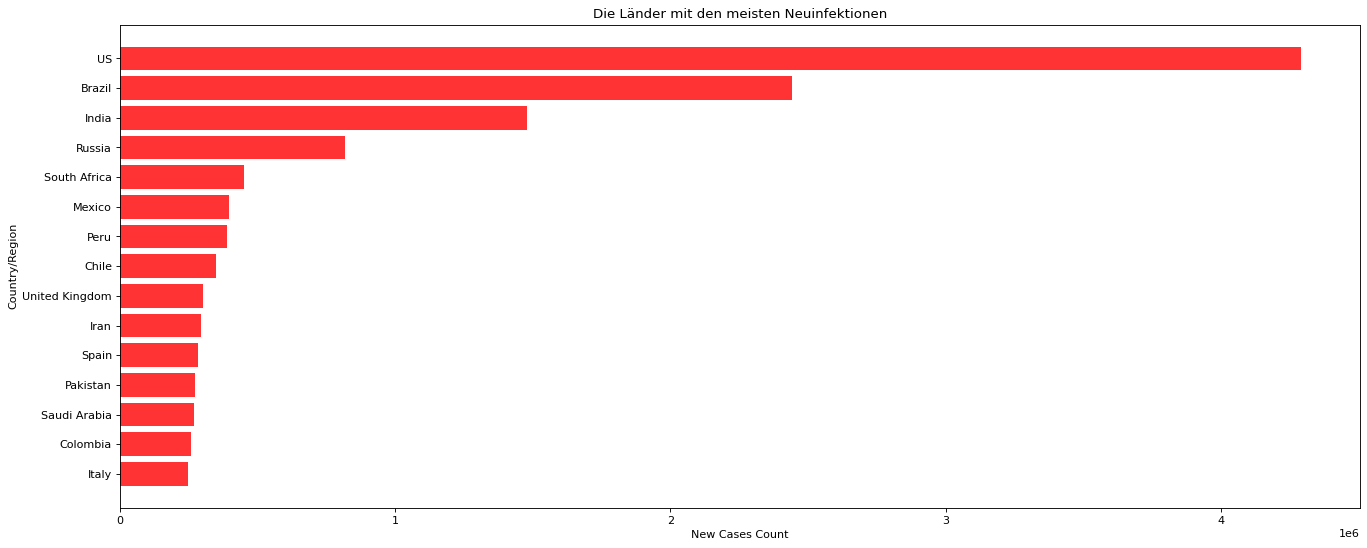

In [6]:

data = df.pivot_table(values='New cases' , index='Country/Region', aggfunc= np.sum).sort_values('New cases')
data = data.tail(15)
print(data)

plt.figure(figsize=(20,8), dpi= 80)
plt.barh(y= data.index ,  width= data['New cases'], color='red', alpha=0.8)


plt.title("Die Länder mit den meisten Neuinfektionen")
plt.xlabel('New Cases Count')
plt.ylabel('Country/Region')
plt.show()

                Confirmed    Deaths  Recovered
Country/Region                                
Spain            27404045   3033030   15093583
India            40883464   1111831   23783720
Russia           45408411    619385   25120448
Brazil           89524967   3938034   54492873
US              224345948  11011411   56353416


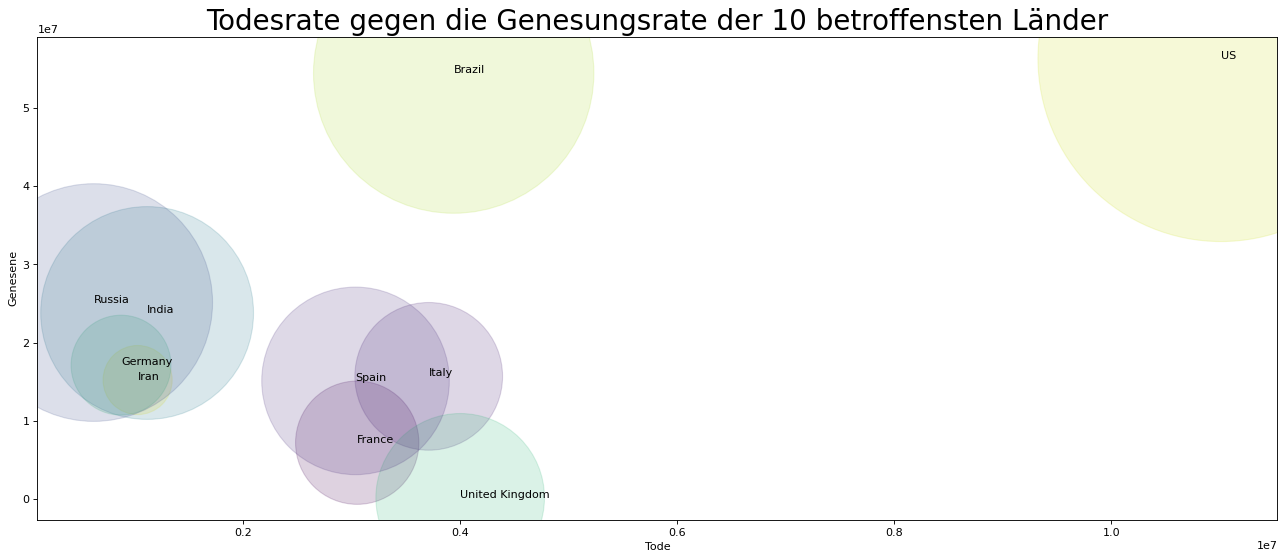

In [60]:
data = df.pivot_table(index="Country/Region", values=["Confirmed", "Recovered" ,"Deaths"], aggfunc=np.sum)
data = data.sort_values("Confirmed").tail(10)

data['Size'] = data['Confirmed'].cumsum()/5000
data['Colors'] = np.random.rand(10)

print(data[["Confirmed", "Deaths", "Recovered"]].tail())

plt.figure(figsize=(20,8), dpi= 80)
plt.scatter('Deaths', 'Recovered', alpha=0.175, s='Size', c='Colors', data=data)

#Labelling
plt.title("Todesrate gegen die Genesungsrate der 10 betroffensten Länder", size=25)
plt.xlabel("Tode")
plt.ylabel("Genesene")

for i, txt in enumerate(data.index):
    plt.annotate(txt, (data.Deaths[i], data.Recovered[i]))

plt.show()